✅ Grafik 1 (Korelasyon) kaydedildi!


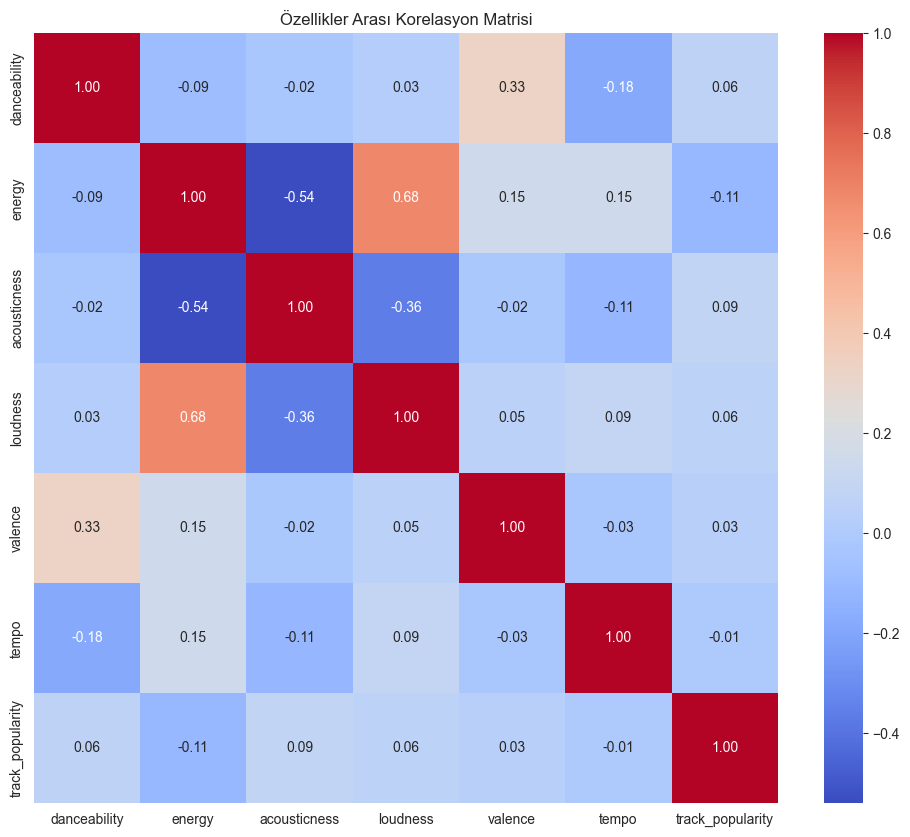

✅ Model R2 Başarı Skoru: 0.263
✅ Grafik 2 (Faktörler) kaydedildi!


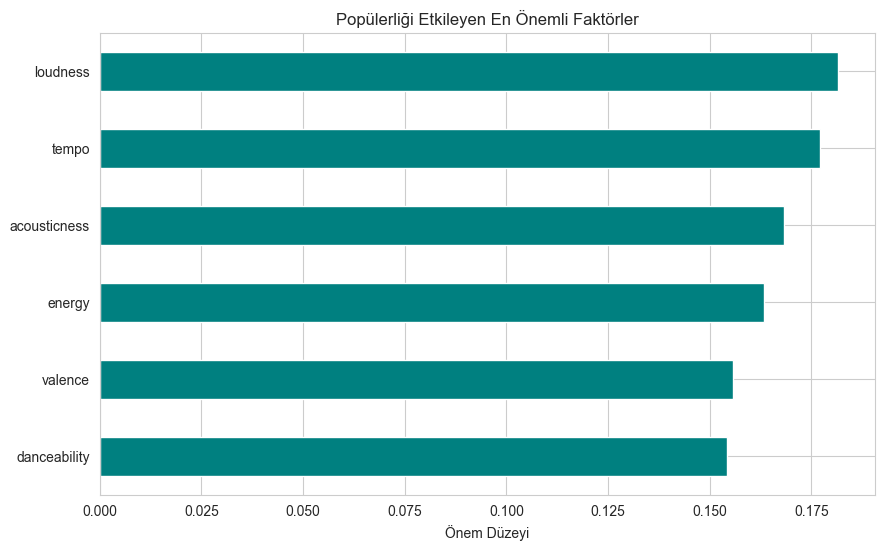

In [1]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Grafiklerin düzgün görünmesi için ayar
sns.set_style("whitegrid")

# 1. Veriyi Yükle
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv"
df = pd.read_csv(url)

# 2. Veri Temizliği
features = ['danceability', 'energy', 'acousticness', 'loudness', 'valence', 'tempo']
target = 'track_popularity'
df_clean = df.dropna(subset=features + [target])

# --- GRAFİK 1: KORELASYON HARİTASI ---
plt.figure(figsize=(12, 10))
# Korelasyonu hesapla ve çiz
sns.heatmap(df_clean[features + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Özellikler Arası Korelasyon Matrisi")

# Ekrana basmadan önce KAYDET
plt.savefig('Grafik1_Korelasyon.png', dpi=300, bbox_inches='tight')
print("✅ Grafik 1 (Korelasyon) kaydedildi!")
plt.show()

# --- GRAFİK 2: MODEL VE ÖNEMLİ FAKTÖRLER ---
# Modeli Kur
X = df_clean[features]
y = df_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Sonucu Yazdır
r2_score = rf_model.score(X_test, y_test)
print(f"✅ Model R2 Başarı Skoru: {r2_score:.3f}")

# Önemli Faktörleri Çiz
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='teal')
plt.title("Popülerliği Etkileyen En Önemli Faktörler")
plt.xlabel("Önem Düzeyi")

# Ekrana basmadan önce KAYDET
plt.savefig('Grafik2_OnemliFaktorler.png', dpi=300, bbox_inches='tight')
print("✅ Grafik 2 (Faktörler) kaydedildi!")
plt.show()